# The Sparks Foundation

## Data Science and Business Analytics

### Task 4: Exploratory Data Analysis - Global Terrorism

Arul Dharshan.S


In this task, we will be performing exploratory data analysis on the dataset "GlobalTerrorism" and try to find out the hot zone of terrorism. Also, we will derive the security issues and various insights.

Importing the Dependencies

In [22]:
import numpy as np 
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Step 1 : Loading and Reading The Data Set 

In [23]:
dat='F:\globalterrorismdb_0718dist.csv'

In [25]:
df=pd.read_csv(dat)
df.head(5)

eventid  iyear  imonth  iday approxdate  extended resolution  country  \
0  197000000001   1970       7     2        NaN         0        NaN       58   
1  197000000002   1970       0     0        NaN         0        NaN      130   
2  197001000001   1970       1     0        NaN         0        NaN      160   
3  197001000002   1970       1     0        NaN         0        NaN       78   
4  197001000003   1970       1     0        NaN         0        NaN      101   

          country_txt  region  ... addnotes scite1 scite2  scite3  dbsource  \
0  Dominican Republic       2  ...      NaN    NaN    NaN     NaN      PGIS   
1              Mexico       1  ...      NaN    NaN    NaN     NaN      PGIS   
2         Philippines       5  ...      NaN    NaN    NaN     NaN      PGIS   
3              Greece       8  ...      NaN    NaN    NaN     NaN      PGIS   
4               Japan       4  ...      NaN    NaN    NaN     NaN      PGIS   

   INT_LOG  INT_IDEO INT_MISC INT_ANY  related  
0        0         0        0       0      NaN  
1        0         1        1       1      NaN  
2       -9        -9        1       1      NaN  
3       -9        -9        1       1      NaN  
4       -9        -9        1       1      NaN  

[5 rows x 135 columns]

In [26]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [27]:
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state',
                       'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                       'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                       'weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

### Step 2 : Dropping out irrelevant columns

In [28]:
df=df[['Year','Month','Day','Country','state','Region','city','latitude','longitude','AttackType','Killed',
               'Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

In [29]:
df.head()

Year  Month  Day             Country    state                       Region  \
0  1970      7    2  Dominican Republic      NaN  Central America & Caribbean   
1  1970      0    0              Mexico  Federal                North America   
2  1970      1    0         Philippines   Tarlac               Southeast Asia   
3  1970      1    0              Greece   Attica               Western Europe   
4  1970      1    0               Japan  Fukouka                    East Asia   

            city   latitude   longitude                      AttackType  \
0  Santo Domingo  18.456792  -69.951164                   Assassination   
1    Mexico city  19.371887  -99.086624     Hostage Taking (Kidnapping)   
2        Unknown  15.478598  120.599741                   Assassination   
3         Athens  37.997490   23.762728               Bombing/Explosion   
4        Fukouka  33.580412  130.396361  Facility/Infrastructure Attack   

   Killed  Wounded                   Target Summary  \
0     1.0      0.0             Julio Guzman     NaN   
1     0.0      0.0  Nadine Chaval, daughter     NaN   
2     1.0      0.0                 Employee     NaN   
3     NaN      NaN             U.S. Embassy     NaN   
4     NaN      NaN           U.S. Consulate     NaN   

                                Group                  Target_type  \
0                              MANO-D  Private Citizens & Property   
1  23rd of September Communist League      Government (Diplomatic)   
2                             Unknown          Journalists & Media   
3                             Unknown      Government (Diplomatic)   
4                             Unknown      Government (Diplomatic)   

  Weapon_type Motive  
0     Unknown    NaN  
1     Unknown    NaN  
2     Unknown    NaN  
3  Explosives    NaN  
4  Incendiary    NaN

In [30]:
# Checking for the null values 
df.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
state             421
Region              0
city              434
latitude         4556
longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            636
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
dtype: int64

### Step 3 : Checking the dataset's information

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   state        181270 non-null  object 
 5   Region       181691 non-null  object 
 6   city         181257 non-null  object 
 7   latitude     177135 non-null  float64
 8   longitude    177134 non-null  float64
 9   AttackType   181691 non-null  object 
 10  Killed       171378 non-null  float64
 11  Wounded      165380 non-null  float64
 12  Target       181055 non-null  object 
 13  Summary      115562 non-null  object 
 14  Group        181691 non-null  object 
 15  Target_type  181691 non-null  object 
 16  Weapon_type  181691 non-null  object 
 17  Motive       50561 non-null   object 
dtypes: float64(4), int64(3),

### Step 4 : Data Visualization

#### Plotting Most Attacked Nation

In [34]:
count_attack = df.Country.value_counts()[:10]
count_attack

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: Country, dtype: int64

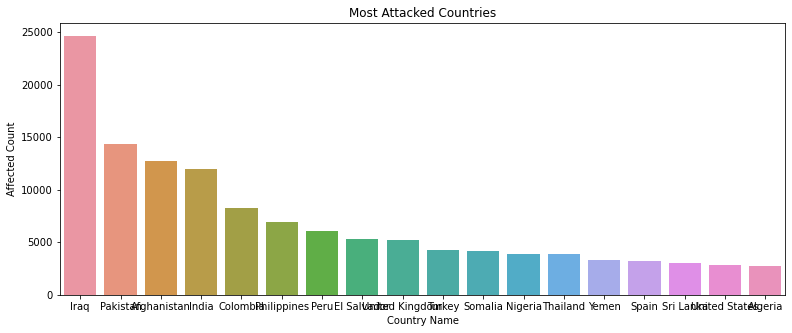

In [41]:
#Plotting 
plt.subplots(figsize=(13,5))
sns.barplot(df['Country'].value_counts()[:18].index,df['Country'].value_counts()[:18].values,)
plt.title('Most Attacked Countries')
plt.xlabel('Country Name')
plt.ylabel('Affected Count')
plt.show()

In [44]:
city_attack = df.city.value_counts()[:15]
city_attack

Unknown         9775
Baghdad         7589
Karachi         2652
Lima            2359
Mosul           2265
Belfast         2171
Santiago        1621
Mogadishu       1581
San Salvador    1558
Istanbul        1048
Athens          1019
Bogota           984
Kirkuk           925
Beirut           918
Medellin         848
Name: city, dtype: int64

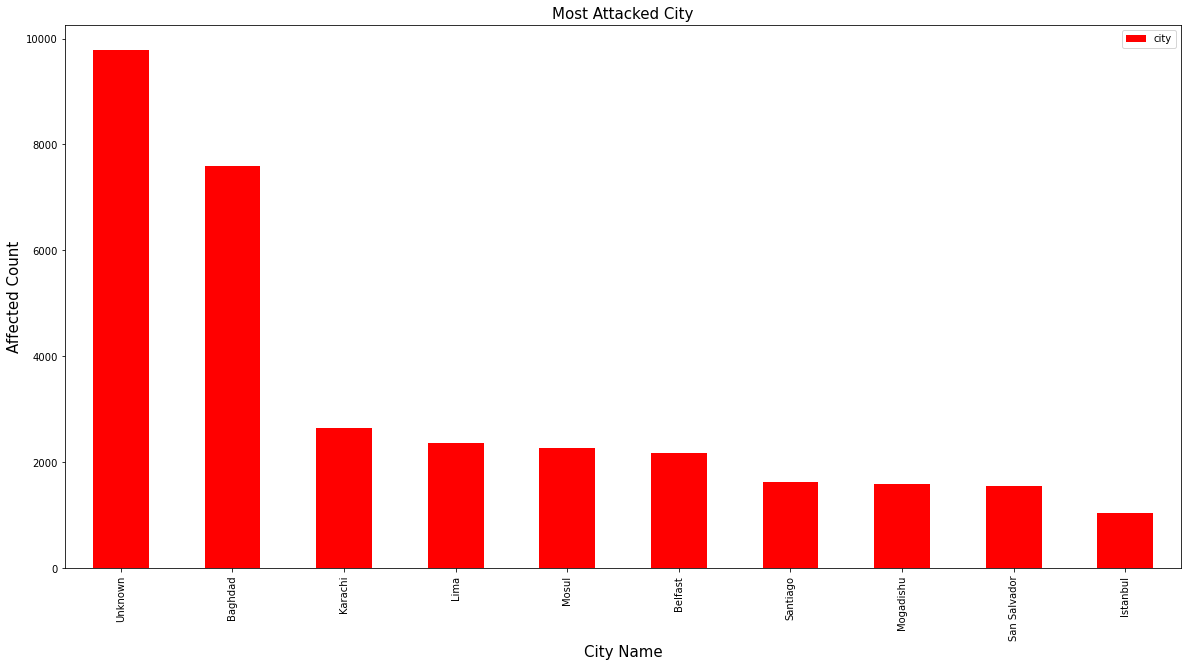

In [45]:
# Plotting Most Attacked City

df['city'].value_counts().to_frame().sort_values('city',axis=0,ascending=False).head(10).plot(kind='bar',figsize=(20,10),color='red')
plt.xlabel("City Name",fontsize=15)
plt.ylabel("Affected Count",fontsize=15)
plt.title("Most Attacked City",fontsize=15)
plt.show()

## Sorting the Most Attacked State

In [46]:
state_attack = df.state.value_counts()[:10]
state_attack

Baghdad               7645
Northern Ireland      4498
Unknown               4290
Balochistan           3710
Saladin               3411
Al Anbar              3299
Nineveh               3241
Sindh                 3206
Khyber Pakhtunkhwa    3084
Diyala                3041
Name: state, dtype: int64

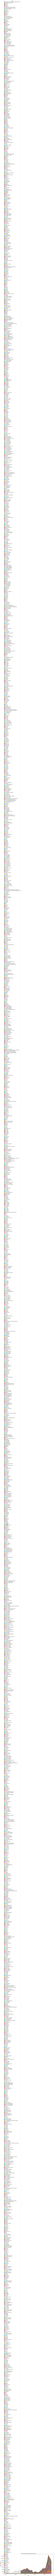

In [50]:
#Plotting The Most Attacked State

pd.crosstab(df.Year, df.state).plot(kind='area',figsize=(15,6))
plt.title('Terrorist Activities by Region in each Year')
plt.ylabel('Number of Attacks')
plt.show()

### Figuring out the Number of Terrorrism occured in a year

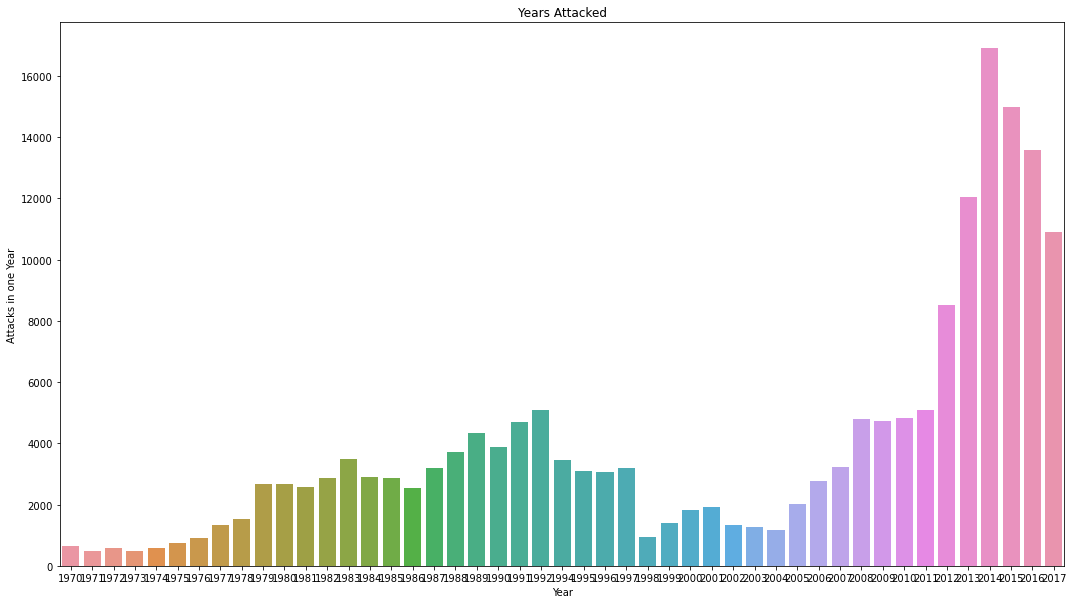

In [51]:
x_year = df['Year'].unique()
y_count_years = df['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (18,10))
sns.barplot(x = x_year,
           y = y_count_years)
plt.xlabel('Year')
plt.ylabel('Attacks in one Year')
plt.title('Years Attacked')
plt.show()

## Sorting and plotting Major Group Attacks

In [52]:
grp_attack = df.Group.value_counts()[:10]
grp_attack

Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
Al-Shabaab                                           3288
New People's Army (NPA)                              2772
Irish Republican Army (IRA)                          2671
Revolutionary Armed Forces of Colombia (FARC)        2487
Boko Haram                                           2418
Name: Group, dtype: int64

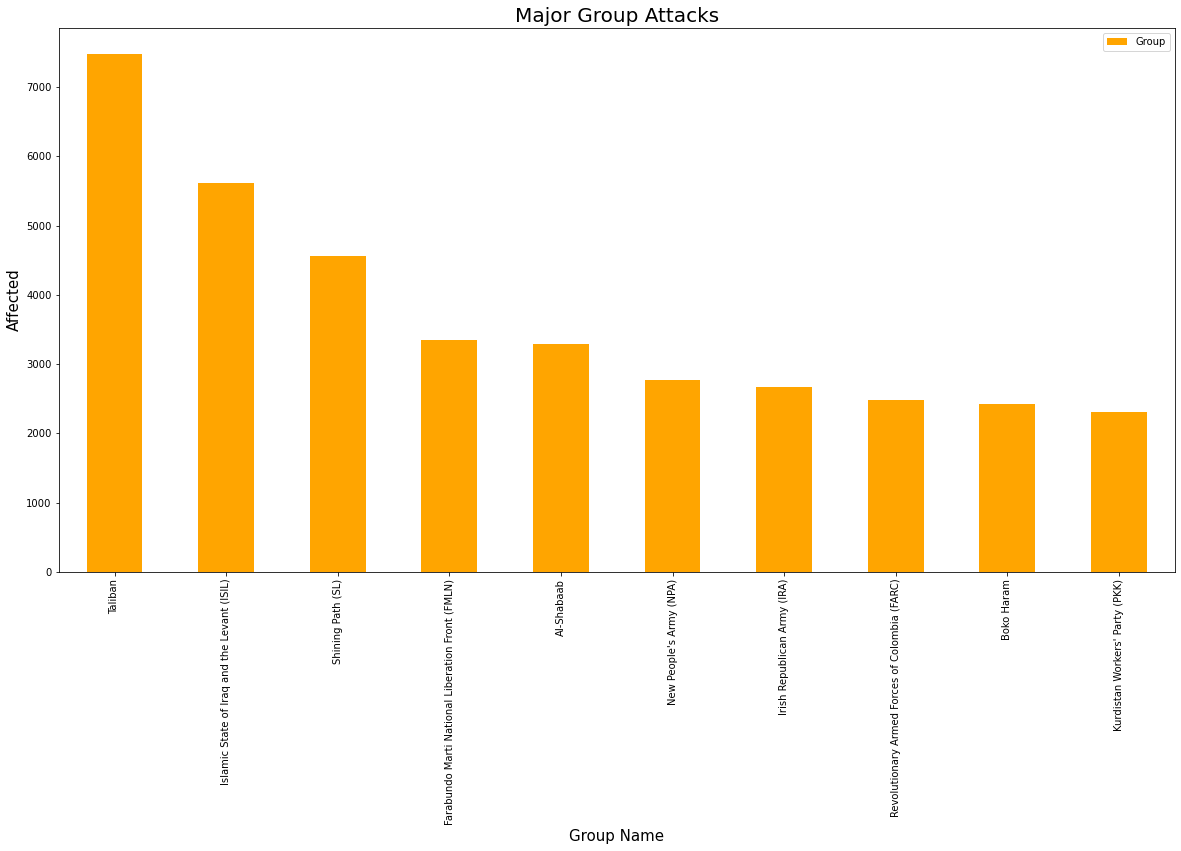

In [53]:
### Plotting the Major Group Attacks

df['Group'].value_counts().to_frame().drop('Unknown').head(10).plot(kind='bar',color='Orange',figsize=(20,10))
plt.title("Major Group Attacks",fontsize=20)
plt.xlabel("Group Name",fontsize=15)
plt.ylabel("Affected",fontsize=15)
plt.show()

## Determining The Death Rate

In [55]:
death = df.loc[:,'Killed']
print('Total death rate is:', int(sum(death.dropna())))

Total death rate is: 411868


## Step5: Conclusion

In [56]:
print("Country with highest attacks:",df['Country'].value_counts().idxmax())
print("City with highest attacks:",df['city'].value_counts().index[1]) 
print("State with highest attacks:",df['Region'].value_counts().idxmax())
print("Year with the most attacks:",df['Year'].value_counts().idxmax())
print("Most Frequent terrorist gropu:",df['Group'].value_counts().index[1])
print("Frequently used Attack types",df['AttackType'].value_counts().idxmax())

Country with highest attacks: Iraq
City with highest attacks: Baghdad
State with highest attacks: Middle East & North Africa
Year with the most attacks: 2014
Most Frequent terrorist gropu: Taliban
Frequently used Attack types Bombing/Explosion


# Observation:

## As a Security Analyst the task was asked to find out the Hot Zone Of Global terrorism.

With the help of Exploratory Data Analysis Visuvalizations. I have attained following results.

### Insights Attained:

### Armed assault and bombing/explosion are seen to be the cause of 77% of the deaths in these attacks. This rate is why these attacks are used so many times in terrorist actions. This is how dangerous weapons and explosives are to the world.

### Talibans are seen to be behind the Hot Zones of Global Terrorism.

### The Current Hot Zones are the Middle East and Western Asia with Northern Africa.

### Terrorist acts in the Middle East and northern Africa have been seen to have fatal consequences. The Middle East and North Africa are seen to be the places of serious terrorist attacks.